In [2]:
from Non_stationary.setting import Setting
from Non_stationary.environment import Environment
from Non_stationary.seller_sliding import SellerSliding
from Non_stationary.seller_prima_dual import PrimalDualSeller
import matplotlib.pyplot as plt
import numpy as np
import copy


In [3]:
# Set seed for reproducibility
seed = 2012
print(f'Seed used for this run: {seed}')
np.random.seed(seed)

# Create shared setting
base_setting = Setting(
    T=300,
    n_products=3,
    epsilon=0.2,
    distribution='gaussian',
    verbose=None,
    B=None,
    budget_constraint="lax",
    non_stationary='slightly',
    dist_params=None,
    algorithm='ucb_sliding'  # will be overridden later for primal_dual
)

Seed used for this run: 2012


In [4]:
env = Environment(base_setting)

DEBUG -- Using seller type: <class 'Non_stationary.seller_sliding.SellerSliding'>
DEBUG -- actions: [0 0 0]
DEBUG -- yield_prices: history is empty, returning random prices
DEBUG -- chosen_prices: [0.1  0.55 0.1 ]
DEBUG -- chosen_prices: [0.1  0.55 0.1 ]
type: <class 'numpy.ndarray'>
shape: (3,)
DEBUG -- dist_params used for buyer: (array([1.]), array([0.59545162, 0.57862041, 0.19105928]))
DEBUG -- dist_params[1] shape: (3,)
DEBUG -- budget_constraint returning: [1 0 1]
DEBUG -- budget_constraint return shape: (3,)
DEBUG -- budget_constraint return dtype: int32
DEBUG -- purchased: [1 0 1]
DEBUG -- purchased dtype: int32
DEBUG -- purchased_clean: [1 0 1]
DEBUG -- purchased_clean.shape: (3,)
Round 0: optimal=1.77, actual=0.20, regret=1.57
DEBUG -- self.purchases row type: <class 'numpy.ndarray'>
DEBUG -- purchased_clean type: <class 'numpy.ndarray'>
DEBUG -- Using seller type: <class 'Non_stationary.seller_sliding.SellerSliding'>
DEBUG -- actions: [1 0 1]
DEBUG -- chosen_prices: [0.325 0

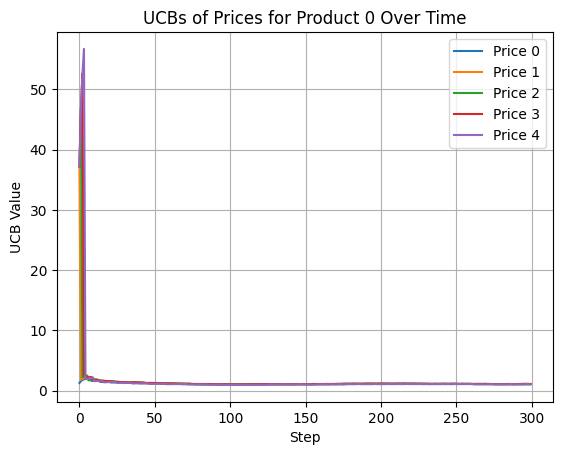

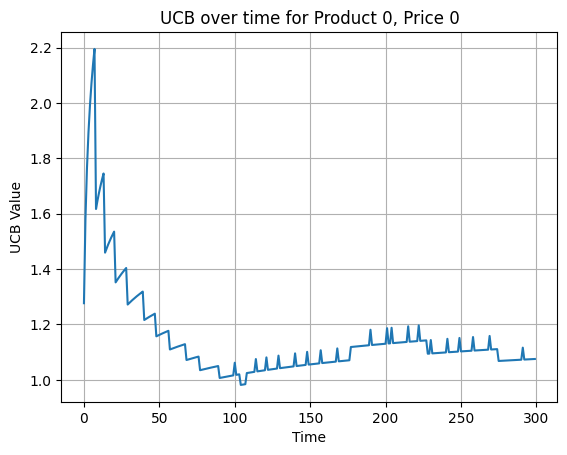

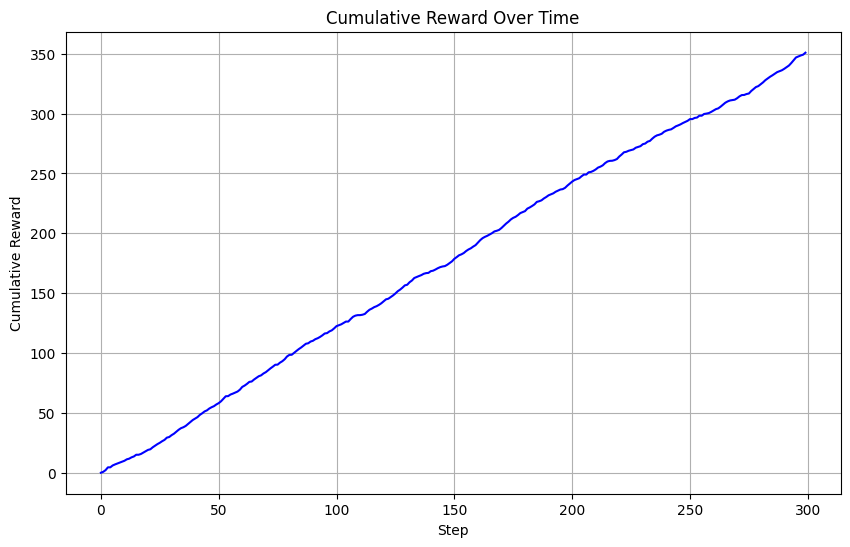

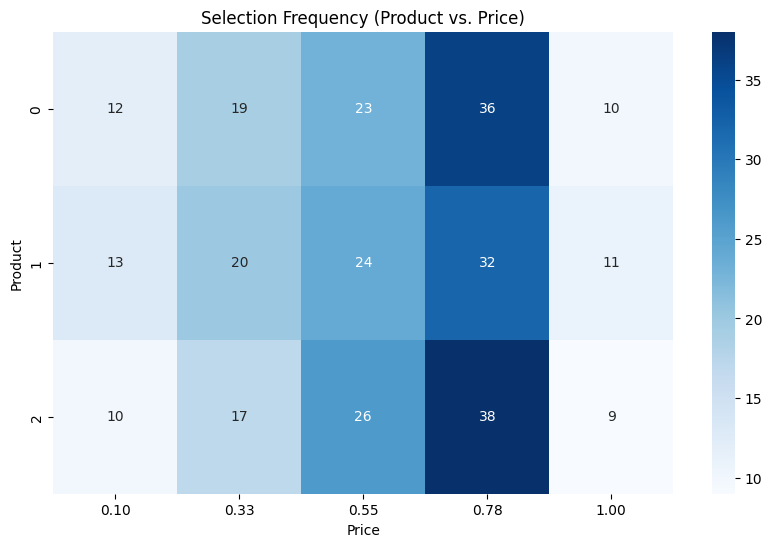

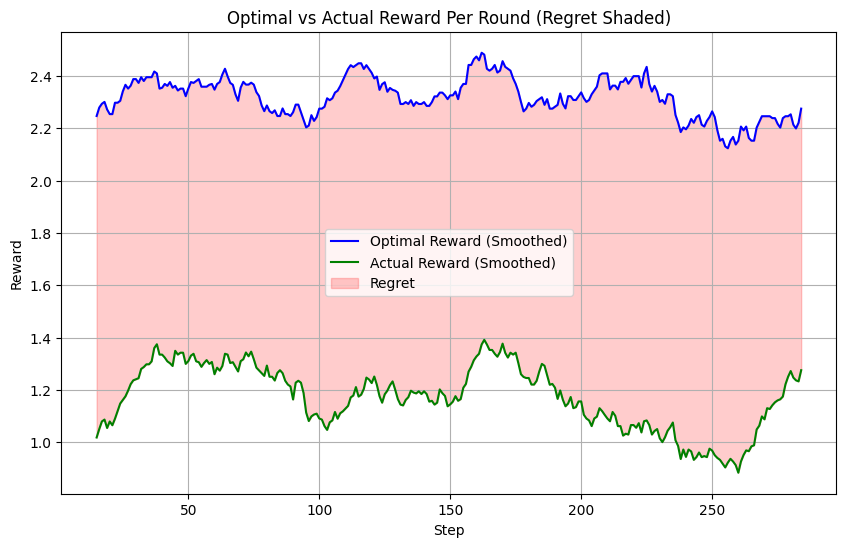

In [5]:
env.play_all_rounds(plot=True)

In [6]:
# === Sliding Window UCB Run ===
setting_sliding = copy.deepcopy(base_setting)
setting_sliding.algorithm = 'ucb_sliding'
seller_sliding = SellerSliding(setting_sliding)
env_sliding = Environment(setting_sliding)
env_sliding.seller = seller_sliding
env_sliding.reset()
env_sliding.play_all_rounds(plot=False)
cum_regret_sliding = np.cumsum(env_sliding.regrets)


DEBUG -- Using seller type: <class 'Non_stationary.seller_sliding.SellerSliding'>
DEBUG -- actions: [0 0 0]
DEBUG -- yield_prices: history is empty, returning random prices
DEBUG -- chosen_prices: [0.55 1.   1.  ]
DEBUG -- chosen_prices: [0.55 1.   1.  ]
type: <class 'numpy.ndarray'>
shape: (3,)
DEBUG -- dist_params used for buyer: (array([1.]), array([0.4033527 , 0.71569539, 0.42878741]))
DEBUG -- dist_params[1] shape: (3,)
DEBUG -- budget_constraint returning: [1 0 0]
DEBUG -- budget_constraint return shape: (3,)
DEBUG -- budget_constraint return dtype: int32
DEBUG -- purchased: [1 0 0]
DEBUG -- purchased dtype: int32
DEBUG -- purchased_clean: [1 0 0]
DEBUG -- purchased_clean.shape: (3,)
Round 0: optimal=2.10, actual=0.55, regret=1.55
DEBUG -- self.purchases row type: <class 'numpy.ndarray'>
DEBUG -- purchased_clean type: <class 'numpy.ndarray'>
DEBUG -- Using seller type: <class 'Non_stationary.seller_sliding.SellerSliding'>
DEBUG -- actions: [0 0 0]
DEBUG -- chosen_prices: [0.1 0.1

In [7]:
# === Primal Dual Run ===
setting_primal = copy.deepcopy(base_setting)
setting_primal.algorithm = 'primal_dual'
seller_primal = PrimalDualSeller(setting_primal)
env_primal = Environment(setting_primal)
env_primal.seller = seller_primal
env_primal.reset()
env_primal.play_all_rounds(plot=False)
cum_regret_primal = np.cumsum(env_primal.regrets)


DEBUG -- Using seller type: <class 'Non_stationary.seller_prima_dual.PrimalDualSeller'>
DEBUG -- actions: [3 3 3]
DEBUG -- chosen_prices: [0.775 0.775 0.775]
DEBUG -- chosen_prices: [0.775 0.775 0.775]
type: <class 'numpy.ndarray'>
shape: (3,)
DEBUG -- dist_params used for buyer: (array([1.]), array([0.35809819, 0.58850409, 0.65067236]))
DEBUG -- dist_params[1] shape: (3,)
DEBUG -- budget_constraint returning: [0 1 0]
DEBUG -- budget_constraint return shape: (3,)
DEBUG -- budget_constraint return dtype: int32
DEBUG -- purchased: [0 1 0]
DEBUG -- purchased dtype: int32
DEBUG -- purchased_clean: [0 1 0]
DEBUG -- purchased_clean.shape: (3,)
DEBUG -- chosen_prices: [0.775 0.775 0.775]
Round 0: optimal=1.88, actual=0.77, regret=1.10
DEBUG -- self.purchases row type: <class 'numpy.ndarray'>
DEBUG -- purchased_clean type: <class 'numpy.ndarray'>
DEBUG -- Using seller type: <class 'Non_stationary.seller_prima_dual.PrimalDualSeller'>
DEBUG -- actions: [2 2 2]
DEBUG -- chosen_prices: [0.55 0.55 

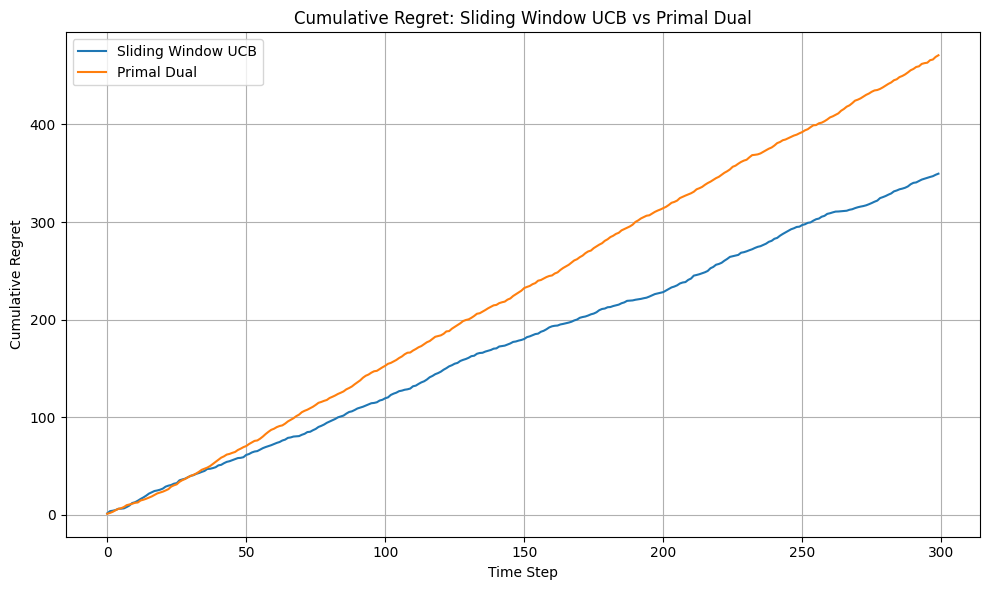

In [8]:
# === Comparison Plot ===
plt.figure(figsize=(10, 6))
plt.plot(cum_regret_sliding, label='Sliding Window UCB')
plt.plot(cum_regret_primal, label='Primal Dual')
plt.xlabel('Time Step')
plt.ylabel('Cumulative Regret')
plt.title('Cumulative Regret: Sliding Window UCB vs Primal Dual')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

